In [1]:
##################################
#  独自ライブライー： contour
# 等高線表示
##################################
import cv2; import numpy as np; import urllib;import matplotlib.pyplot as plt
def contour (score):
    
    score_n = 256*(score-score.min()) // score.max()
   
    h, w = score_n.shape
    score_c = np.zeros((h,w))
    for temp_y in range(h):
        for temp_x in range(w):
    
            if score_n[temp_y, temp_x] % 8 == 0:
                score_c[temp_y, temp_x] = 255
    
    imgs= [score_n, score_c]
    
    plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
    fig_exh_base = 100+len(imgs)*10
    for idx, tmp_img in enumerate(imgs):
        tmp_img = tmp_img.astype(np.uint8)
        tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)

        plt.subplot(fig_exh_base+idx+1)
        plt.imshow(tmp_im4p)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


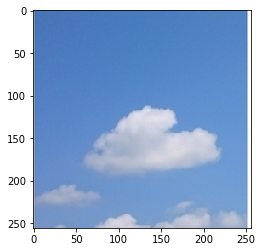

In [2]:
sky_url = "https://static.minne.com/profiles/2686518/large/589b58b41036956c04da78a4b06fce4c6173db7d.jpg"
img_sky = cv2.imdecode(np.fromstring(urllib.request.urlopen(sky_url).read(), np.uint8), cv2.IMREAD_COLOR)

img_sky4p = cv2.cvtColor(img_sky, cv2.COLOR_BGR2RGB)
plt.imshow(img_sky4p)

In [3]:
##################################
#  独自ライブラリー： mshow
# (複数に対応したノートブック上画像表示)
##################################
import cv2;import numpy as np;import matplotlib as mpl;import matplotlib.pyplot as plt
%matplotlib inline
def mshow(img1, img2=None, img3=None, img4=None, img5=None):

    imgs = list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5])) 
    
    
    if len(imgs) == 1:
        # 一枚のとき
        imgs[0] = imgs[0].astype(np.uint8)
        im4p = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
        plt.imshow(im4p)

    else:
        # 複数枚のとき。横に並べていく
        plt.figure(figsize=(len(imgs)*4, len(imgs)*4))
        fig_exh_base = 100+len(imgs)*10
        for idx, tmp_img in enumerate(imgs):
            tmp_img = tmp_img.astype(np.uint8)
            tmp_im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(fig_exh_base+idx+1)
            plt.imshow(tmp_im4p)


In [4]:
def template_matching_ssd(src, temp):

    global score
    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h-ht):
        for dx in range(0, w-wt):
            diff = (src[dy:dy+ht, dx:dx+wt] - temp)**2

            score[dy, dx] = diff.sum()

            pt = np.unravel_index(score.argmin(), score.shape)
            
            
            if dy % 300 == 0 and dx % 500 ==0: print("...matching__ ","dx:",dx,"dy:", dy)

    return (pt[1], pt[0], score)

In [5]:
##画像の右と下に黒い部分を継ぎ足す

def bulk_img( img, bulk_h, bulk_w):

    h, w =  img.shape[0], img.shape[1]
    
    dst = None
    d = None
    if len(img.shape) > 2:
        breakpoint()
        d = img.shape[2]
        dst = np.concatenate([img, np.zeros((bulk_h, w, d ))],axis = 0)
#         breakpoint()
        dst = np.concatenate([dst, np.zeros((h+bulk_h, bulk_w,d ))], axis = 1)
    else:
        dst = np.concatenate([img, np.zeros((bulk_h, w ))])
        dst = np.concatenate([dst, np.zeros((h+bulk_h, bulk_w ))], axis = 1)

    return (dst)


...matching__  dx: 0 dy: 0


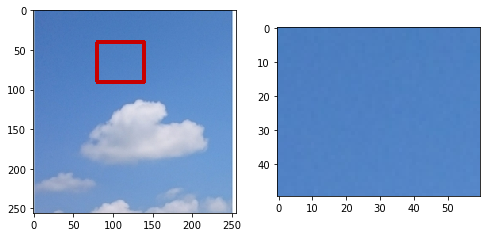

In [6]:
gray_sky = cv2.cvtColor(img_sky, cv2.COLOR_RGB2GRAY)
temp_sky_org = img_sky[40:90,80:140].copy()

temp_sky = cv2.cvtColor(temp_sky_org, cv2.COLOR_RGB2GRAY)
# temp_sky = gray_sky[40:90,80:140]
# breakpoint()
h, w = temp_sky.shape
pt_sky = template_matching_ssd(gray_sky, temp_sky)

score_sky = pt_sky[2]
score_sky = bulk_img(score_sky, h, w)

cv2.rectangle(img_sky, (pt_sky[0], pt_sky[1]), (pt_sky[0] + w, pt_sky[1] + h), (0, 0, 200), 3)
mshow(img_sky, temp_sky_org)

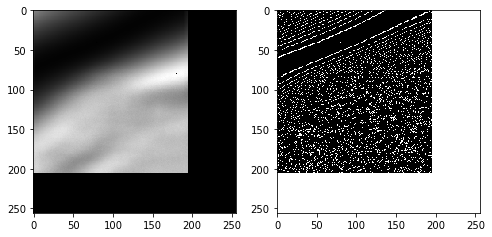

In [7]:
contour(score_sky)